# Regular Expressions & Word Tokenization

### Intro to Regular Expressions

In [2]:
#Regex are strings with a special syntax
#Allows us to match patterns in other strings
#Applications of regex: Find all web links in a document, parse email addresses, remove / replace unwanted characters etc.

In [7]:
import re

In [3]:
#re.match(pattern, string)
re.match('abc', 'abcdef')

<re.Match object; span=(0, 3), match='abc'>

In [4]:
#special patterns
word_regex = '\w+'
re.match(word_regex, 'hi there!') #matches first word in a sentence

<re.Match object; span=(0, 2), match='hi'>

In [5]:
#Common regex patterns (there are 100s of them and these are just a few common ones)
# \w+  word (\w will just pull individual characters and \w+ will pull word)
# \d   digit
# \s   space
# .*   wildcard (matches any letter or symbol)
# + or * greedy match (matches repeats of sigle letter or whole patterns)
# \S   not space
# []   create a group of characters eg. [a-z] lowercase group

In [6]:
#Python re module
#re: module
#split: split a string on regex
#findall: find all patterns in a string
#search: search for a pattern
#match: match an entire string or substring based on a pattern
#sub: substitutes pattern with string Eg: re.sub(r"\?", " ", "abc?") this substitutes question mark with space

#pass pattern first and then string
#may return an iterator, string or match object

In [7]:
re.split('\s+', 'Split on spaces.')

['Split', 'on', 'spaces.']

In [10]:
re.findall(r"\w+", "Let's wrtie RegEx!")

['Let', 's', 'wrtie', 'RegEx']

In [11]:
#It is important to prefix regex patterns with r to ensure that patterns are interpreted correctly
#specially escape sequences in strings
#Eg: "\n" in Python is used to indicate a new line but if we use r prefix, it will be interpreted as raw string 
#that is charater "\" followed by character "n" and not as a new line

In [8]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or [perhaps, all] 19 words?"

#Split on Sentence endings
re.split(r"[.?!]", my_string)

["Let's write RegEx",
 "  Won't that be fun",
 '  I sure think so',
 '  Can you find 4 sentences',
 '  Or [perhaps, all] 19 words',
 '']

In [13]:
#Find all capitalised words
re.findall(r"[A-Z]\w+", my_string)

['Let', 'RegEx', 'Won', 'Can', 'Or']

In [14]:
#Split string on spaces
re.split(r"\s+", my_string)

["Let's",
 'write',
 'RegEx!',
 "Won't",
 'that',
 'be',
 'fun?',
 'I',
 'sure',
 'think',
 'so.',
 'Can',
 'you',
 'find',
 '4',
 'sentences?',
 'Or',
 'perhaps,',
 'all',
 '19',
 'words?']

In [23]:
re.findall(r"\d+", my_string)

['4', '19']

In [33]:
#Difference between re.search() and re.match()
#when the pattern that we are looking for is present in the beginning of the string then both will give identical results
#Eg:
re.match('abc','abcde') #will give result as 'abc'
re.search('abc','abcde') #will give result as 'abc'

#match tries to match a string from the beginning and search will go through the entire string
#Eg:
re.match('cd','abcde') #will not give any result
re.search('cd','abcde') #will give result as 'cd'

#use match when you want to look for pattern specifically at the beginning of the string
#and use search when you want to look for pattern anywhere in the string

<re.Match object; span=(2, 4), match='cd'>

In [38]:
#Search for 1st occurence of "find"
text1 = re.search(r"find", my_string)
text1

<re.Match object; span=(66, 70), match='find'>

In [39]:
#Start and end indexes
print(text1.start(), text1.end())

66 70


In [41]:
#Find first text in square brackets
re.search(r"\[.*]", my_string)

<re.Match object; span=(88, 102), match='[perhaps, all]'>

In [45]:
#Find the script notation
new_string = 'Abhishek: Hey, what are you doing?'
re.match(r".*:", new_string)
#OR
re.match(r"[a-zA-Z0-9\s]+:", new_string)

<re.Match object; span=(0, 9), match='Abhishek:'>

### Intro to Tokenization

In [17]:
#Turning a string or document into tokens (smaller chunks)
#One step in preparing a text for NLP
#Many different theories and rules
#You can create your own rules using regular expressions
#Examples:
# 1. Breaking out words or sentences
# 2. Separating punctuation
# 3. Separating all hashtags in a tweet

#Common library: nltk (natural language toolkit)

In [19]:
#Not required, did this since the next code block was generating an error and asked to download punkt
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bansal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [20]:
from nltk.tokenize import word_tokenize
word_tokenize("Hi there!")

['Hi', 'there', '!']

In [21]:
#Why tokenize?
#Easier to map part of speech
#Matching common words
#Removing unwanted tokens

In [22]:
#Other nltk tokenizers
#sent_tokenize: tokenize a document into sentences
#regexp_tokenize: tokenize a string or document based on a regex pattern
#TweetTokenizer: special class just for tweet tokenization, 
#allowing you to separate hashtags, mentions and lots of exclamation points

In [9]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer

#Split my_string into sentences
sentences = sent_tokenize(my_string)
sentences

["Let's write RegEx!",
 "Won't that be fun?",
 'I sure think so.',
 'Can you find 4 sentences?',
 'Or [perhaps, all] 19 words?']

In [35]:
#Tokenize the 4th sentence into words
tokenize_sent = word_tokenize(sentences[3])
tokenize_sent

['Can', 'you', 'find', '4', 'sentences', '?']

In [37]:
#Make a set of unique tokens in the entire my_string
unique_tokens = set(word_tokenize(my_string))
unique_tokens

{'!',
 "'s",
 ',',
 '.',
 '19',
 '4',
 '?',
 'Can',
 'I',
 'Let',
 'Or',
 'RegEx',
 'Wo',
 'all',
 'be',
 'find',
 'fun',
 "n't",
 'perhaps',
 'sentences',
 'so',
 'sure',
 'that',
 'think',
 'words',
 'write',
 'you'}

### Advanced Tokenization with NLTK and regex

In [46]:
#Regex groups and ranges
# OR is represented using |
# you can define a group using ()
# you can define explicit character ranges using []

In [49]:
#Using regex find all digits and words
re.findall(('(\d+|\w+)'), 'He has 11 cats.')

['He', 'has', '11', 'cats']

In [53]:
#Regex ranges and groups
# [A-Za-z]+  matches upper and lowercase English alphabet
# [0-9] matches numbers from 0 to 9
# [A-Za-z\-\.] matches upper and lowercase English alphabet, - and .  # \ is an escape charater 
# (a-z) matches a, - and z #this will only match if there is a-z, it won't match a- etc.
# (\s+|,)  matches spaces or a comma

In [54]:
my_str = 'match lowercase spaces nums like 12, but no commas'
re.match('[a-z0-9 ]+', my_str)

<re.Match object; span=(0, 35), match='match lowercase spaces nums like 12'>

In [58]:
#regexp_tokenize
my_str = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"
regexp_tokenize(my_str, r"(\w+|#\d|\?|!)") #OR #re.findall(r"(\w+|#\d|\?|!)",my_str)

['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']

In [69]:
#TweetTokenizer
tweets = ['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

#Hashtags on the first tweet
regexp_tokenize(tweets[0], r"#\w+")

#Mentions and hashtags on the last tweet
regexp_tokenize(tweets[-1], r"[#@]\w+")

#Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()  #create an instance of TweetTokenizer class
all_tokens = [tknzr.tokenize(t) for t in tweets]     #Use .tokenize() method of tknzr
all_tokens

[['This',
  'is',
  'the',
  'best',
  '#nlp',
  'exercise',
  'ive',
  'found',
  'online',
  '!',
  '#python'],
 ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'],
 ['Thanks', '@datacamp', ':)', '#nlp', '#python']]

### Non-ascii tokenization

In [72]:
#German with emoji
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'
german_text

'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

In [73]:
#Tokenize words
word_tokenize(german_text)

['Wann',
 'gehen',
 'wir',
 'Pizza',
 'essen',
 '?',
 '🍕',
 'Und',
 'fährst',
 'du',
 'mit',
 'Über',
 '?',
 '🚕']

In [74]:
#Tokenize only capital words
regexp_tokenize(german_text, r"[A-ZÜ]\w+")

['Wann', 'Pizza', 'Und', 'Über']

In [75]:
#Tokenize and print only emoji
#Unicode ranges for emoji are:
#('\U0001F300'-'\U0001F5FF'), ('\U0001F600-\U0001F64F'), ('\U0001F680-\U0001F6FF'), and ('\u2600'-\u26FF-\u2700-\u27BF')
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
regexp_tokenize(german_text, emoji)

['🍕', '🚕']

### Charting word length with NLTK

In [1]:
from matplotlib import pyplot as plt

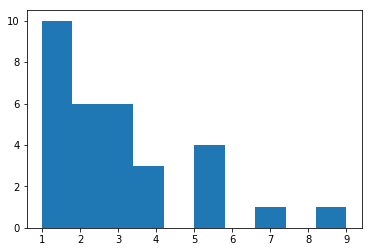

In [13]:
#Plotting word length in a histogram
words = word_tokenize(my_string)
word_length = [len(w) for w in words]
plt.hist(word_length)
plt.show()

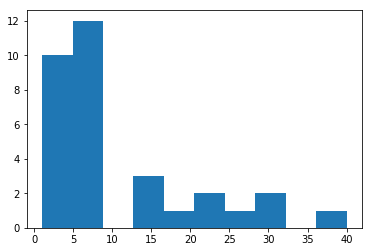

In [24]:
#Plotting words in each line
text = "SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a temperate zone.\nARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?\nSOLDIER #1: Are you suggesting coconuts migrate?\nARTHUR: Not at all.  They could be carried.\nSOLDIER #1: What?  A swallow carrying a coconut?\nARTHUR: It could grip it by the husk!\nSOLDIER #1: It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconut.\nARTHUR: Well, it doesn't matter.  Will you go and tell your master that Arthur from the Court of Camelot is here.\nSOLDIER #1: Listen.  In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?\nARTHUR: Please!\nSOLDIER #1: Am I right?\nARTHUR: I'm not interested!\nSOLDIER #2: It could be carried by an African swallow!\nSOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.  That's my point.\nSOLDIER #2: Oh, yeah, I agree with that.\nARTHUR: Will you ask your master if he wants to join my court at Camelot?!"

#Splitting the text into lines
lines = re.split(r"\n", text)    #text.split("\n") can also be used

#Replacing lines for speaker names
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:" # "?" means 0 or more times and "{2,}" means 2 or more times
lines = [re.sub(pattern, '', l) for l in lines]

#Tokenize each line
tokenized_lines = [regexp_tokenize(s, r"\w+") for s in lines]

#Frequency list of lengths
line_num_words = [len(tl) for tl in tokenized_lines]

#Plot
plt.hist(line_num_words)
plt.show()

# Simple Topic Identification